In [1]:
%env CUDA_LAUNCH_BLOCKING=1


env: CUDA_LAUNCH_BLOCKING=1


In [2]:
import torch
torch.cuda.empty_cache()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.downloader
from transformers import pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
df_train=pd.read_csv('labeled_data.csv')

In [11]:
# No empty data..plus Id is there, which I don't need. So, I'm dropping it
df_train.drop(labels=['Unnamed: 0'],axis=1,inplace=True)

In [12]:
df_train.loc[(df_train['class']== 0),'class']=1

In [13]:
df_train.loc[(df_train['class']==2),'class']=0


In [14]:
hatespeech=df_train[df_train['class']==1]['class'].count()
not_hatespeech=df_train[df_train['class']==0]['class'].count()

Text(0.5, 1.0, 'Class Distribution')

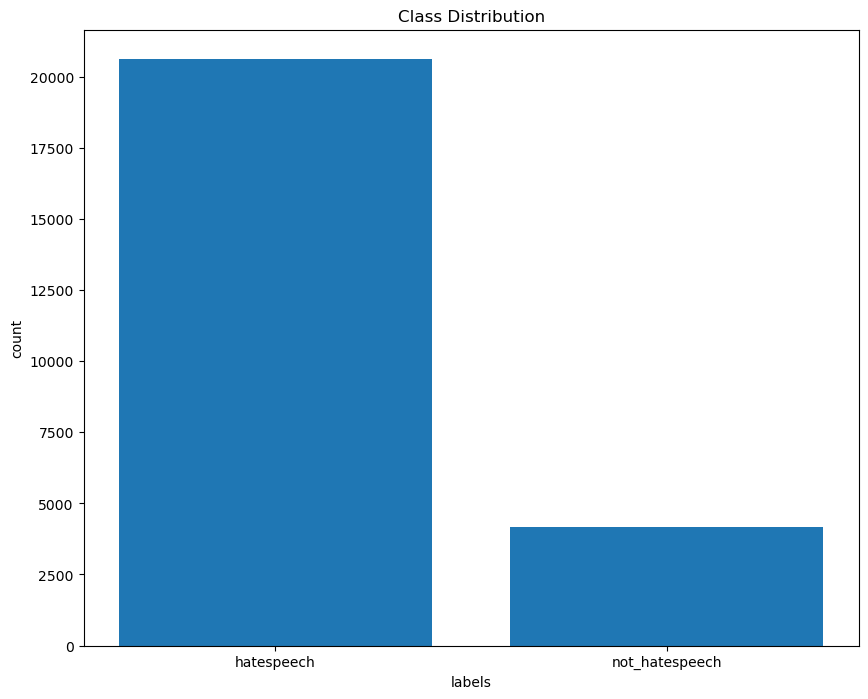

In [15]:
plt.figure(figsize=(10,8))
plt.bar(x=['hatespeech','not_hatespeech'],height=[hatespeech,not_hatespeech])
plt.xlabel('labels')
plt.ylabel('count')
plt.title('Class Distribution')

In [16]:
X=df_train['tweet']
y=df_train['class']

In [17]:
y.value_counts()

1    20620
0     4163
Name: class, dtype: int64

# Now the final check with the fine tuned model and also fine tuning the pre trained model

In [18]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available


True


In [48]:
hatspeech_detector = pipeline("text-classification", model="facebook/roberta-hate-speech-dynabench-r4-target",device=0)



In [49]:
y_pred=hatspeech_detector(X.to_list())

In [50]:
y_corrected_label=[]
for i in y_pred:
    y_corrected_label.append(0 if i['label']=='nothate' else 1)

In [51]:
y_corrected_label

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


In [52]:
accuracy = accuracy_score(y, y_corrected_label)

In [53]:
print(accuracy)

0.931202840656902


In [34]:
y_pred

[{'label': 'nothate', 'score': 0.9589849710464478},
 {'label': 'hate', 'score': 0.9983701109886169},
 {'label': 'hate', 'score': 0.9989686012268066},
 {'label': 'hate', 'score': 0.9853327870368958},
 {'label': 'hate', 'score': 0.9981948733329773},
 {'label': 'hate', 'score': 0.9991942048072815},
 {'label': 'hate', 'score': 0.9987518787384033},
 {'label': 'hate', 'score': 0.9993641972541809},
 {'label': 'hate', 'score': 0.9987234473228455},
 {'label': 'hate', 'score': 0.9784327745437622},
 {'label': 'nothate', 'score': 0.999832034111023},
 {'label': 'nothate', 'score': 0.8580303192138672},
 {'label': 'hate', 'score': 0.8129104375839233},
 {'label': 'nothate', 'score': 0.9831233620643616},
 {'label': 'hate', 'score': 0.851659893989563},
 {'label': 'hate', 'score': 0.995158851146698},
 {'label': 'hate', 'score': 0.6984385251998901},
 {'label': 'nothate', 'score': 0.9496482014656067},
 {'label': 'nothate', 'score': 0.9940856695175171},
 {'label': 'hate', 'score': 0.9961416125297546},
 {'la

In [35]:
y

0        0
1        0
2        0
3        0
4        0
        ..
24778    0
24779    0
24780    0
24781    0
24782    0
Name: class, Length: 24783, dtype: int64

In [36]:
y.count()

24783

In [38]:
len(y_corrected_label)

24783

In [59]:
precision, recall, f1, _ = precision_recall_fscore_support(y, y_corrected_label, average="weighted")

print(
        accuracy,
       precision,
       recall,
         f1
    )

0.931202840656902 0.9381392620087877 0.931202840656902 0.9334316886110847


In [62]:
print(cm)
tn, fp, fn, tp = confusion_matrix(y,y_corrected_label).ravel()
print(tn, fp, fn, tp)

[[ 3690   473]
 [ 1232 19388]]
3690 473 1232 19388


## Trying with pre processing?

In [19]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(row):
    row = row.lower()
    row = re.sub(r'[^\w\s]', '', row)
    words = row.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words) if words else 'empty'

        

In [20]:
x_preprocessed = [preprocess(row) for row in X]


In [21]:
y_pred=hatspeech_detector(x_preprocessed)

NameError: name 'hatspeech_detector' is not defined

In [69]:
y_corrected_label=[]
for i in y_pred:
    y_corrected_label.append(0 if i['label']=='nothate' else 1)

In [71]:
accuracy = accuracy_score(y, y_corrected_label)
precision, recall, f1, _ = precision_recall_fscore_support(y, y_corrected_label, average="weighted")
conf_matrix=confusion_matrix(y, y_corrected_label)
# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
tn, fp, fn, tp = confusion_matrix(y,y_corrected_label).ravel()
print(tn, fp, fn, tp)

Accuracy: 0.9499657022959287
Precision: 0.9513019522960852
Recall: 0.9499657022959287
F1 Score: 0.950502362791866
Confusion Matrix:
[[ 3659   504]
 [  736 19884]]
3659 504 736 19884


# Further Fine tuning this facebook model

In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "facebook/roberta-hate-speech-dynabench-r4-target"

# Load the tokenizer and model using Auto classes
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


In [23]:
print(model.config.label2id)
# Output: {'nothate': 0, 'hate': 1}
print(model.config.id2label)


None
{0: 'nothate', 1: 'hate'}


In [24]:
train_x, eval_x, train_y, eval_y = train_test_split(x_preprocessed, y, test_size=0.2, stratify=y)

train_data = {'text': train_x, 'labels': train_y}
train_dataset = Dataset.from_dict(train_data)

eval_data = {'text': eval_x, 'labels': eval_y}
eval_dataset = Dataset.from_dict(eval_data)

In [25]:
# Tokenize the train and eval datasets
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=True, max_length=512)

# Apply tokenization
train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/19826 [00:00<?, ? examples/s]

Map:   0%|          | 0/4957 [00:00<?, ? examples/s]

In [26]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device) 

Using device: cuda


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [27]:
# Define training arguments with logging and evaluation strategy
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # set to 'steps'
    logging_dir="./logs",  # Directory to store logs
    logging_steps=500,  # Log every 100 steps
    save_strategy="epoch",  # Save checkpoint every 'steps'
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="tensorboard",  # This will allow me to visualize the metrics with TensorBoard
)

# Initialize the Trainer with the training arguments
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer
)


C:\Users\acer\anaconda3\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\acer\AppData\Local\Temp\ipykernel_21724\296350451.py:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [28]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.390800,0.606140
2,0.141300,0.195097
3,0.145700,0.187473


TrainOutput(global_step=14871, training_loss=0.23146373776226853, metrics={'train_runtime': 3674.1976, 'train_samples_per_second': 16.188, 'train_steps_per_second': 4.047, 'total_flos': 4256360903667000.0, 'train_loss': 0.23146373776226853, 'epoch': 3.0})

In [29]:

# Get predictions and true labels from the eval dataset
predictions = trainer.predict(eval_dataset)
predicted_labels = predictions.predictions.argmax(axis=-1)
true_labels = predictions.label_ids

In [30]:
# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9566269921323381
Precision: 0.9822353811991118
Recall: 0.9653249272550921
F1 Score: 0.9737067384126208
Confusion Matrix:
[[ 761   72]
 [ 143 3981]]


In [31]:
tn, fp, fn, tp = conf_matrix.ravel()
print(tn, fp, fn, tp)

761 72 143 3981


In [33]:
# Save the model
trainer.save_model("./saved_model")

# Save the tokenizer
tokenizer.save_pretrained("./saved_model")



('./saved_model\\tokenizer_config.json',
 './saved_model\\special_tokens_map.json',
 './saved_model\\vocab.json',
 './saved_model\\merges.txt',
 './saved_model\\added_tokens.json',
 './saved_model\\tokenizer.json')